# Lab 4  
#### kavaskar 
#### 2347230

### 1. Import Necessary Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to display images
def display_image(img, title, cmap='gray'):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

### 2. Load the Satellite Image and Convert it to Grayscale

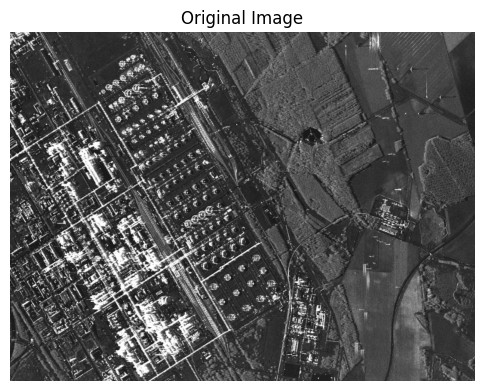

In [2]:
# Load image
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Display original image
display_image(image, 'Original Image')

### 3. Fourier Transform and Shift to Frequency Domain

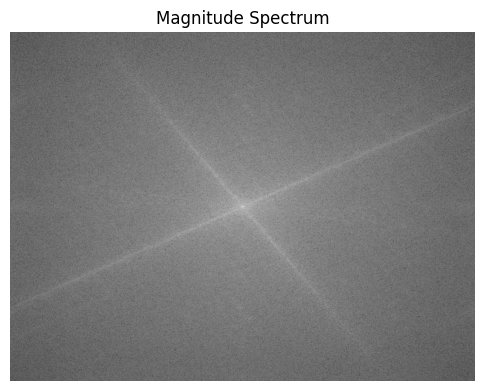

In [3]:
# Apply Fourier Transform to the image
f_transform = np.fft.fft2(image)
f_transform_shift = np.fft.fftshift(f_transform)

# Magnitude Spectrum of the frequency domain
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shift))

# Display frequency representation
display_image(magnitude_spectrum, 'Magnitude Spectrum')

### 4. Define Filters

We will define the different filters: Ideal Low Pass/High Pass, Butterworth Low Pass/High Pass, and Gaussian Low Pass/High Pass. Each will be parameterized by a cutoff radius.

In [4]:
# Function to create an Ideal Low Pass filter
def ideal_low_pass(shape, cutoff):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    mask = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - center[0])**2 + (j - center[1])**2) <= cutoff:
                mask[i, j] = 1
    return mask

# Function to create an Ideal High Pass filter
def ideal_high_pass(shape, cutoff):
    return 1 - ideal_low_pass(shape, cutoff)

# Function to create a Butterworth Low Pass filter
def butterworth_low_pass(shape, cutoff, n):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    mask = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            mask[i, j] = 1 / (1 + (distance / cutoff)**(2 * n))
    return mask

# Function to create a Butterworth High Pass filter
def butterworth_high_pass(shape, cutoff, n):
    return 1 - butterworth_low_pass(shape, cutoff, n)

# Function to create a Gaussian Low Pass filter
def gaussian_low_pass(shape, cutoff):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    mask = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            mask[i, j] = np.exp(-(distance**2) / (2 * (cutoff**2)))
    return mask

# Function to create a Gaussian High Pass filter
def gaussian_high_pass(shape, cutoff):
    return 1 - gaussian_low_pass(shape, cutoff)


### 5. Apply Filters and Visualize Results

We will apply each filter to the frequency domain of the image and then transform it back to the spatial domain for visualization.

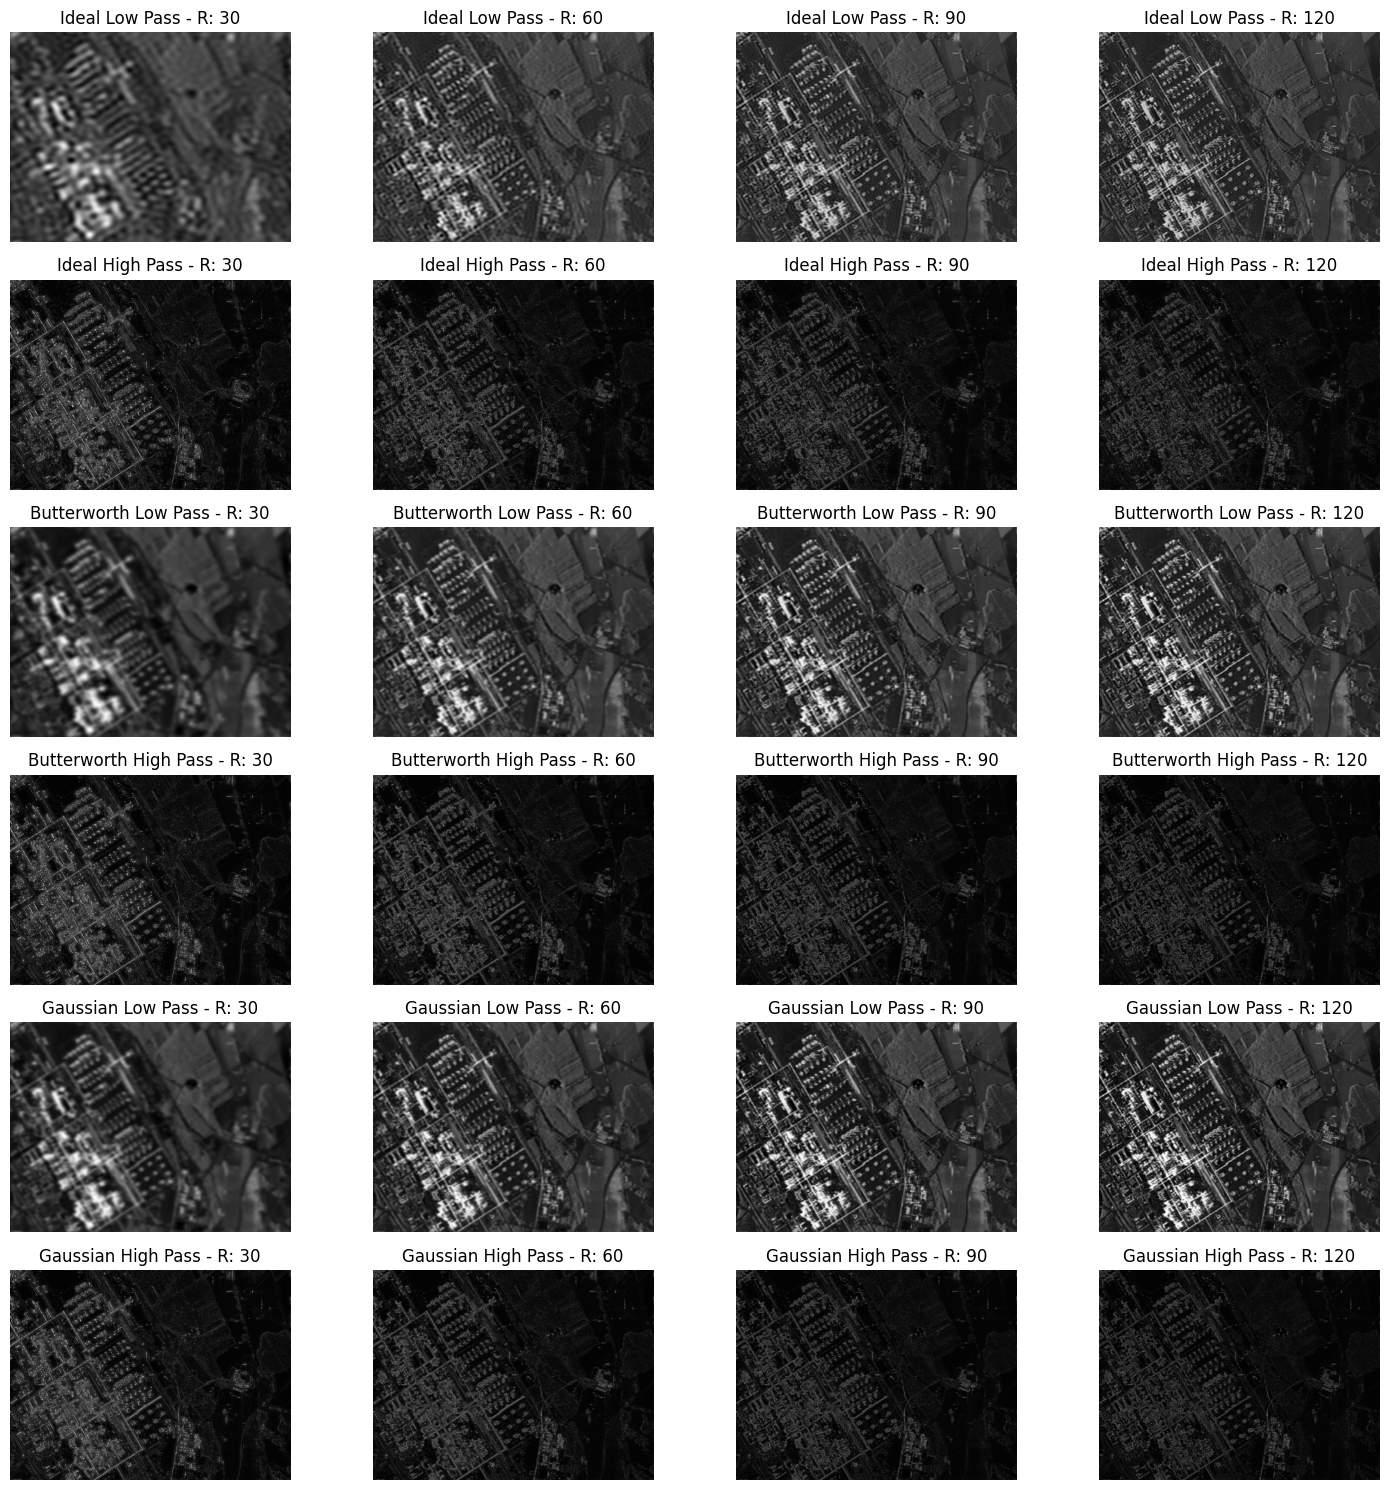

In [6]:
# Function to apply filter and inverse transform
def apply_filter(image, filter_mask):
    f_transform = np.fft.fft2(image)
    f_transform_shift = np.fft.fftshift(f_transform)
    filtered_shift = f_transform_shift * filter_mask
    filtered_transform = np.fft.ifftshift(filtered_shift)
    filtered_image = np.fft.ifft2(filtered_transform)
    return np.abs(filtered_image)

# Define cutoff radii to analyze
cutoff_radii = [30, 60, 90, 120]

# Function to display images in a grid
def display_grid(filtered_images, titles, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(filtered_images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Collect all results to display in a grid
filtered_images = []
titles = []

# Apply Ideal Low Pass Filter
for radius in cutoff_radii:
    ideal_lp_mask = ideal_low_pass(image.shape, radius)
    filtered_image = apply_filter(image, ideal_lp_mask)
    filtered_images.append(filtered_image)
    titles.append(f'Ideal Low Pass - R: {radius}')

# Apply Ideal High Pass Filter
for radius in cutoff_radii:
    ideal_hp_mask = ideal_high_pass(image.shape, radius)
    filtered_image = apply_filter(image, ideal_hp_mask)
    filtered_images.append(filtered_image)
    titles.append(f'Ideal High Pass - R: {radius}')

# Apply Butterworth Low Pass Filter
n = 2  # order of the filter
for radius in cutoff_radii:
    butter_lp_mask = butterworth_low_pass(image.shape, radius, n)
    filtered_image = apply_filter(image, butter_lp_mask)
    filtered_images.append(filtered_image)
    titles.append(f'Butterworth Low Pass - R: {radius}')

# Apply Butterworth High Pass Filter
for radius in cutoff_radii:
    butter_hp_mask = butterworth_high_pass(image.shape, radius, n)
    filtered_image = apply_filter(image, butter_hp_mask)
    filtered_images.append(filtered_image)
    titles.append(f'Butterworth High Pass - R: {radius}')

# Apply Gaussian Low Pass Filter
for radius in cutoff_radii:
    gauss_lp_mask = gaussian_low_pass(image.shape, radius)
    filtered_image = apply_filter(image, gauss_lp_mask)
    filtered_images.append(filtered_image)
    titles.append(f'Gaussian Low Pass - R: {radius}')

# Apply Gaussian High Pass Filter
for radius in cutoff_radii:
    gauss_hp_mask = gaussian_high_pass(image.shape, radius)
    filtered_image = apply_filter(image, gauss_hp_mask)
    filtered_images.append(filtered_image)
    titles.append(f'Gaussian High Pass - R: {radius}')

# Display all filtered images in a grid
display_grid(filtered_images, titles, 6, 4)  # 6 rows, 4 columns (for each filter and radius)


### 6. Analysis and Interpretation

- **Ideal Low Pass Filter**: As the cutoff radius increases, the image retains more low-frequency components, resulting in a blurred image but with smoother transitions.
- **Ideal High Pass Filter**: Higher cutoff radii highlight the edges and sharp details of the image, as high-frequency components are preserved.
- **Butterworth Filters**: These provide a smoother transition between preserved and discarded frequencies, with sharper images as the cutoff radius increases.
- **Gaussian Filters**: Like the Butterworth filter, but with an even smoother falloff. The Low Pass Filter smoothens the image, while the High Pass Filter emphasizes the edges.
